In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
from scikits.bootstrap import ci

# credit to http://people.duke.edu/~ccc14/pcfb/analysis.html
def bootstrap(data, num_samples, statistic, alpha=0.05):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])


### Artist jump distributions

In [2]:
artist_jump_data = pd.read_table('../foragingAnalysis/MPA/jumpdists',header=None,names=['userid','vals'])
arr = np.array([[int(val) for val in row.split(',')] for row in artist_jump_data['vals']])
arrmean = arr/arr.sum(1,keepdims=True).astype(float)

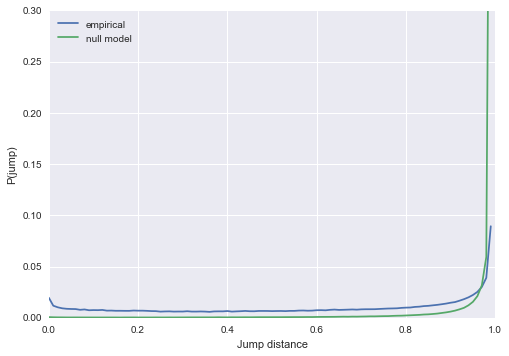

In [3]:
bins = np.arange(0,1.01,0.01)
fig,ax = plt.subplots(1,1)
randhops = np.load('../testData/1Mrandhops.npy')
ax.plot(bins[:-1],np.nanmean(arrmean,0),label='empirical')
ax.plot(bins[:-1],randhops,label='null model')
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump)')
ax.set_ylim(0,0.3)
ax.legend(loc='upper left')

In [4]:
ci_lower = []
ci_upper = []
for i in xrange(arrmean.shape[1]):
    #lower,upper = ci(arrmean[:,i],statfunction=np.nanmean,n_samples=1000)
    lower,upper = bootstrap(arrmean[:,i],statistic=np.nanmean,num_samples=1000)
    ci_lower.append(lower)
    ci_upper.append(upper)

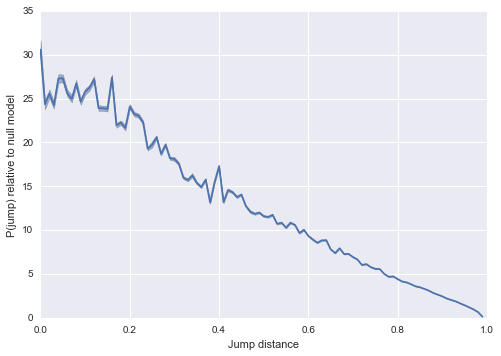

In [5]:
bins = np.arange(0,1.01,0.01)
fig,ax = plt.subplots(1,1)
ax.plot(bins[:-1],np.nanmean(arrmean,0)/randhops)
ax.fill_between(bins[:-1],np.array(ci_lower)/randhops,np.array(ci_upper)/randhops,alpha=0.5)
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump) relative to null model')

In [6]:
arrmean.shape

(19079, 100)